# Computer Vision

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Session 3

## Task 1 & 2

Class AMIT_Image & Subplot Function

In [3]:
class AMIT_Image:
  def __init__(self,path=None):
    self.img_gray=None
    self.img_binary=None
    self.img_adapt=None
    self.img_org=None
    self.img=None
    if path is not None:
      try:
        self.img =  cv2.imread(path)
        self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
        self.img_org=self.img
      except:
        pass
  
  def load(self,path):
    try:
      self.img =  cv2.imread(path)
      self.img = cv2.cvtColor(self.img, cv2.COLOR_BGR2RGB)
      self.img_org=self.img
    except:
      pass
    return self.img

  def display(self,img=None,title='AMIT_Image'):
    if img is None:
      img=self.img
    fig = plt.figure(figsize = (15,5))
    plt.title(title)
    if (len(img.shape)==3):
      plt.imshow(img)
    elif (len(img.shape)==2):
      plt.imshow(img , cmap = 'gray')

  def displayImages(self,numImages=1,imgList=None,title='AMIT_Image'):
    f = plt.figure(figsize=(15,10))
    if imgList is not None:
      for i in range(numImages):
        ax = f.add_subplot((numImages/3)+1,3,i+1)
        ax.imshow(imgList[i])
        if type(title) is list:
          try:
            ax.set_title(title[i])
          except:
            ax.set_title('AMIT_Image')
        else:
          ax.set_title(title)

  def RGB_Gray(self,img=None):
    if img is None:
      img=self.img_org
    try:
      self.img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      self.img=self.img_gray
    except:
      self.img_gray=None
    return self.img_gray

  def Adaptive_Ther(self,img=None,value1=19,value2=3):
    if img is None:
      if self.img_gray is None:
        try:
          self.img_gray = cv2.cvtColor(self.img, cv2.COLOR_RGB2GRAY)
          img=self.img_gray
        except:
          pass
      else:
        img=self.img_gray
    try:
      binary_image = cv2.adaptiveThreshold(img, 255, cv2.BORDER_REPLICATE, cv2.ADAPTIVE_THRESH_MEAN_C,value1,value2)
      self.img_adapt=binary_image
      self.img=self.img_adapt
    except:
      self.img_adapt=None
    return self.img_adapt

  def Binar_Ther(self,img=None):
    if img is None:
      if self.img_gray is None:
        try:
          self.img_gray = cv2.cvtColor(self.img, cv2.COLOR_RGB2GRAY)
          img=self.img_gray
        except:
          pass
      else:
        img=self.img_gray
    try:
      ret,mask = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
      self.img_binary=mask
      self.img=self.img_binary
    except:
      self.img_binary=None
    return self.img_binary

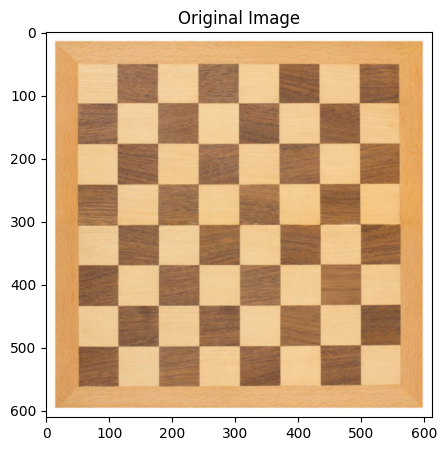

In [5]:
Image1 = AMIT_Image('Chess.jpg')
Image1.display(title='Original Image')

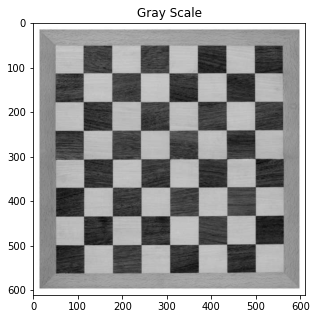

In [4]:
Image1.RGB_Gray()
Image1.display(title='Gray Scale')

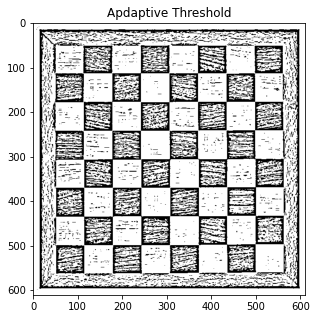

In [5]:
Image1.Adaptive_Ther()
Image1.display(title='Apdaptive Threshold')

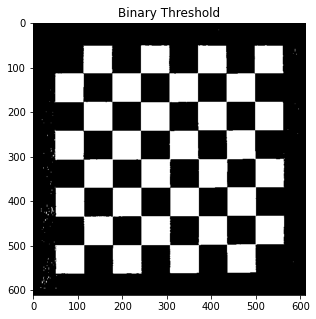

In [6]:
Image1.Binar_Ther()
Image1.display(title='Binary Threshold')

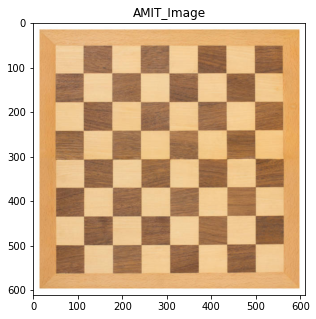

In [7]:
Image1.load('Chess.jpg')
Image1.display()

In [8]:
im1 = Image1.load('Chess.jpg')
im2 = Image1.load('Coins.jpeg')
im3 = Image1.load('Dogs.jpeg')

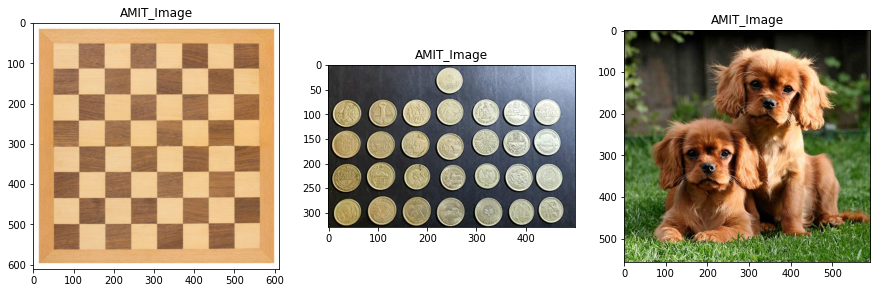

In [9]:
Image1.displayImages(imgList=[im1, im2, im3],numImages=3)

## Task 3

Line Detection

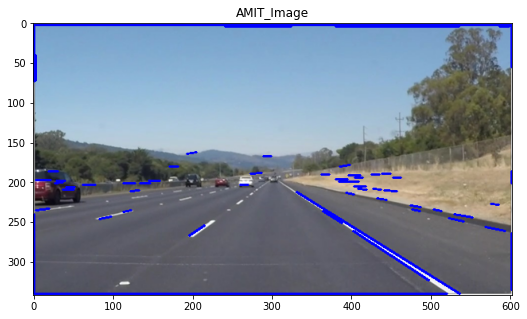

In [10]:
Image2 = AMIT_Image()
lane = Image2.load('Lane.png')

laneGray = Image2.RGB_Gray()
can   =  cv2.Canny(laneGray,10,127)
lines =  cv2.HoughLinesP(can,1,np.pi/180,100,100,10)

len(lines)

for i in range (len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(lane , (x1,y1),(x2,y2),(0,0,255),2)

Image2.display(lane)

## Task 4

Circle Detection

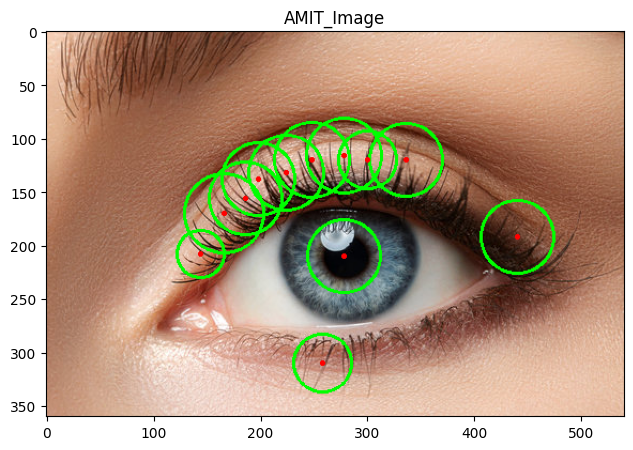

In [40]:
Image3 = AMIT_Image()
eye = Image3.load('Eye.jpg')

eyeGray = Image3.RGB_Gray()
eyeGrayBlurred = cv2.blur(eyeGray,(3,3))
detectedCircles =  cv2.HoughCircles(eyeGrayBlurred,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=20,maxRadius=40)

if detectedCircles is not None:
  detectedCircles=np.uint16(np.around(detectedCircles))

  for pt in detectedCircles[0,:]:
    a,b,r=pt[0],pt[1],pt[2]
    cv2.circle(eye,(a,b),r,(0,255,0),2)
    cv2.circle(eye,(a,b),1,(255,0,0),2)
    

Image3.display(eye)

# Session 4


## Exercise 1

Real Time Face Detection

In [49]:
faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
video = cv2.VideoCapture(0)

while True:
    ret,frame = video.read()
    if ret:
        Image4 = AMIT_Image()
        frame_gray = Image4.RGB_Gray(frame)
        faces = faceClassifier.detectMultiScale(frame_gray, 1.1, 7,minSize=(60,60),flags=cv2.CASCADE_SCALE_IMAGE)
        

        for (x,y,w,h) in faces:
            face_gray = frame_gray[y:y+h, x:x+w]
            face_color = frame[y:y+h, x:x+w]
            a=int(x+(w/2))
            b=int(y+(h/2))
            r=int((a+b)/4)
            eyes = eyeClassifier.detectMultiScale(face_gray)
            
            cv2.circle(frame,(a,b),int(0.8*r),(255,0,0),2)
        
        for (x,y,w,h) in eyes:
            a=int(x+(w/2))
            b=int(y+(h/2))
            r=int((a+b)/4)
            cv2.circle(face_color,(a,b),int(0.4*r),(0,0,255),2)
        
        cv2.imshow("Camera Feed", frame)

    if cv2.waitKey(1) & 0Xff == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

## Task 1

Happy Home

In [47]:
faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smileClassifier = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml')

video = cv2.VideoCapture(0)

while True:
    ret,frame = video.read()
    if ret:
        Image4 = AMIT_Image()
        frame_gray = Image4.RGB_Gray(frame)
        faces = faceClassifier.detectMultiScale(frame_gray, 1.1, 7,minSize=(60,60),flags=cv2.CASCADE_SCALE_IMAGE)
        

        for (x,y,w,h) in faces:
            face_gray = frame_gray[y:y+h, x:x+w]
            face_color = frame[y:y+h, x:x+w]
            
            smile = smileClassifier.detectMultiScale(face_gray, 1.8, 20)
            
            cv2.rectangle(frame,[x,y,w,h],(255,0,0),2)

        if len(smile)!=0:
            cv2.putText(frame, 'Happy', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
        
            for (x,y,w,h) in smile:
                cv2.rectangle(face_color,[x,y,w,h],(0,255,0),2)
        else:
            cv2.putText(frame, 'Sad', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
            
        
        cv2.imshow("Camera Feed", frame)

    if cv2.waitKey(1) & 0Xff == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

## Task 2

Full Body Detection

In [66]:
bodyClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_fullbody.xml')
video = cv2.VideoCapture('messi.mp4')

while True:
    ret,frame = video.read()
    if ret:
        Image4 = AMIT_Image()
        frame_gray = Image4.RGB_Gray(frame)
        bodies = bodyClassifier.detectMultiScale(frame_gray, 1.2, 3)

        for (x,y,w,h) in bodies:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
        cv2.imshow("Camera Feed", frame)

    if cv2.waitKey(1) & 0Xff == ord('q'):
        break

video.release()
cv2.destroyAllWindows()